In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import statistics
import seaborn as sns

In [3]:
# Read CSV into a DataFrame
csv_path = "SHR76_17.csv"
murder_df = pd.read_csv(csv_path)
murder_df.head()

,ID,CNTYFIPS,Ori,State,Agency,Agentype,Source,Solved,Year,Month,...,OffEthnic,Weapon,Relationship,Circumstance,Subcircum,VicCount,OffCount,FileDate,fstate,MSA
0,197601001AKASP00,"Juneau, AK",AKASP00,Alaska,State Troopers,Primary state LE,FBI,Yes,1976,January,...,Unknown or not reported,Knife or cutting instrument,Husband,Other arguments,NaN,0,0,30180.0,Alaska,Rural Alaska
1,197601001AL00102,"Jefferson, AL",AL00102,Alabama,Birmingham,Municipal police,FBI,Yes,1976,January,...,Unknown or not reported,Shotgun,Acquaintance,Felon killed by private citizen,Felon killed in commission of a crime,0,0,30180.0,Alabama,"Birmingham-Hoover, AL"
2,197601001AL00104,"Jefferson, AL",AL00104,Alabama,Fairfield,Municipal police,FBI,Yes,1976,January,...,Unknown or not reported,Shotgun,Wife,Other,NaN,0,0,30180.0,Alabama,"Birmingham-Hoover, AL"
3,197601001AL00106,"Jefferson, AL",AL00106,Alabama,Leeds,Municipal police,FBI,Yes,1976,January,...,Unknown or not reported,Knife or cutting instrument,Brother,Other arguments,NaN,0,0,30180.0,Alabama,"Birmingham-Hoover, AL"
4,197601001AL00201,"Mobile, AL",AL00201,Alabama,Mobile,Municipal police,FBI,Yes,1976,January,...,Unknown or not reported,Strangulation - hanging,Acquaintance,Circumstances undetermined,NaN,0,0,30180.0,Alabama,"Mobile, AL"


In [4]:
# Clean data up!
murder_weapons_series = murder_df['Weapon']

# Combine Gun categories
murder_weapons_series = murder_weapons_series.replace(to_replace=['Rifle', 'Handgun', 'Firearm', 'Shotgun', 'Other Gun', 'Handgun - pistol, revolver, etc', 'Firearm, type not stated', 'Other gun'], value='Gun')
murder_df = murder_df.assign(Weapon=murder_weapons_series)

# Combine Circumstances
murder_circumstance_series = murder_df['Circumstance']
murder_circumstance_series = murder_circumstance_series.replace(to_replace=['Other arguments', 'Argument over money or property'], value='Arguments')
murder_circumstance_series = murder_circumstance_series.replace(to_replace=['Other negligent handling of gun', 'Children playing with gun', 'Gun-cleaning death - other than self', 'Victim shot in hunting accident'], value='Gun Negligence')
murder_circumstance_series = murder_circumstance_series.replace(to_replace=['Rape', 'Other sex offense'], value='Sex Offense')
murder_circumstance_series = murder_circumstance_series.replace(to_replace=['Circumstances undetermined', 'Other', 'Other - not specified', 'All other manslaughter by negligence', 'All suspected felony type'], value='Other')
murder_circumstance_series = murder_circumstance_series.replace(to_replace=['Robbery', 'Burglary', 'Motor vehicle theft', 'Larceny'], value='Theft')
murder_circumstance_series = murder_circumstance_series.replace(to_replace=['Brawl due to influence of alcohol', 'Brawl due to influence of narcotics', 'Narcotic drug laws'], value='Drug & Alcohol Related')
murder_circumstance_series = murder_circumstance_series.replace(to_replace=['Gangland killings', 'Juvenile gang killings'], value='Gang Related')
murder_df = murder_df.assign(Circumstance=murder_circumstance_series)

murder_relationship_series = murder_df['Relationship']
murder_relationship_series = murder_relationship_series.replace(to_replace=['Husband', 'Wife', 'Common-law husband', 'Common-law wife'], value='Spouse')
murder_relationship_series = murder_relationship_series.replace(to_replace=['Brother', 'Sister'], value='Sibling')
murder_relationship_series = murder_relationship_series.replace(to_replace=['Mother', 'Father'], value='Parent')
murder_relationship_series = murder_relationship_series.replace(to_replace=['Ex-husband', 'Ex-wife'], value='Ex')
murder_relationship_series = murder_relationship_series.replace(to_replace=['Stepmother', 'Stepfather'], value='Stepparent')
murder_relationship_series = murder_relationship_series.replace(to_replace=['Stepdaughter', 'Stepson'], value='Stepchild')
murder_relationship_series = murder_relationship_series.replace(to_replace=['Boyfriend', 'Girlfriend'], value='Partner')
murder_relationship_series = murder_relationship_series.replace(to_replace=['Relationship not determined', 'Other - known to victim'], value='Other')
murder_df = murder_df.assign(Relationship=murder_relationship_series)

murder_df.head()

,ID,CNTYFIPS,Ori,State,Agency,Agentype,Source,Solved,Year,Month,...,OffEthnic,Weapon,Relationship,Circumstance,Subcircum,VicCount,OffCount,FileDate,fstate,MSA
0,197601001AKASP00,"Juneau, AK",AKASP00,Alaska,State Troopers,Primary state LE,FBI,Yes,1976,January,...,Unknown or not reported,Knife or cutting instrument,Spouse,Arguments,NaN,0,0,30180.0,Alaska,Rural Alaska
1,197601001AL00102,"Jefferson, AL",AL00102,Alabama,Birmingham,Municipal police,FBI,Yes,1976,January,...,Unknown or not reported,Gun,Acquaintance,Felon killed by private citizen,Felon killed in commission of a crime,0,0,30180.0,Alabama,"Birmingham-Hoover, AL"
2,197601001AL00104,"Jefferson, AL",AL00104,Alabama,Fairfield,Municipal police,FBI,Yes,1976,January,...,Unknown or not reported,Gun,Spouse,Other,NaN,0,0,30180.0,Alabama,"Birmingham-Hoover, AL"
3,197601001AL00106,"Jefferson, AL",AL00106,Alabama,Leeds,Municipal police,FBI,Yes,1976,January,...,Unknown or not reported,Knife or cutting instrument,Sibling,Arguments,NaN,0,0,30180.0,Alabama,"Birmingham-Hoover, AL"
4,197601001AL00201,"Mobile, AL",AL00201,Alabama,Mobile,Municipal police,FBI,Yes,1976,January,...,Unknown or not reported,Strangulation - hanging,Acquaintance,Other,NaN,0,0,30180.0,Alabama,"Mobile, AL"


In [5]:
#relationship_weapon = pd.crosstab(murder_df.Relationship, murder_df.Weapon)
#relationship_weapon
#relationship_weapon_df = pd.DataFrame(relationship_weapon)

In [52]:
rape_circ = murder_df.loc[murder_df['Circumstance'] == 'Rape']

rape_murder = rape_circ.groupby("OffRace")["Relationship"].count()

rape_murder_df = pd.DataFrame(rape_murder)
rape_murder_df

,Relationship
OffRace,


In [6]:
pd.crosstab(murder_df.Relationship, murder_df.Weapon)

Weapon,Asphyxiation - includes death by gas,"Blunt object - hammer, club, etc",Drowning,Explosives,Fire,Gun,Knife or cutting instrument,Motor Vehicle/Vessel,"Narcotics or drugs, sleeping pills",Other or type unknown,"Personal weapons, includes beating",Poison - does not include gas,Pushed or thrown out window,Strangulation - hanging
Relationship,,,,,,,,,,,,,,
Acquaintance,530,7547,159,68,1183,99580,29292,0,570,3771,8489,83,67,1444
Daughter,622,437,291,22,354,1902,505,0,131,1402,3006,53,10,151
Employee,5,31,1,7,13,277,57,0,1,30,27,0,0,8
Employer,4,64,0,0,2,342,109,0,3,23,18,3,0,11
Ex,10,73,4,1,19,2516,417,0,3,76,99,2,0,41
Friend,95,1329,52,12,145,16636,5623,0,246,856,1459,10,10,282
Homosexual relationship,21,164,4,0,12,507,690,0,6,57,112,5,0,87
In-law,10,138,5,4,26,3520,782,0,7,87,169,7,1,23
Neighbor,45,521,18,4,259,4733,1711,0,6,174,422,2,3,132


""


No handles with labels found to put in legend.


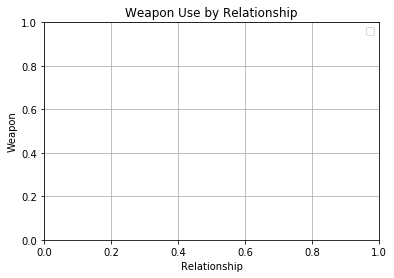

In [25]:
plt.errorbar(x=weapons_df['Relationship'],y=weapons_df["Weapon"], yerr=None, linestyle="--", fmt='o')
plt.errorbar(x=survival_rate_df['Timepoint'],y=survival_rate_df["Infubinol % survival"], yerr=None, linestyle="--", fmt='o')
plt.errorbar(x=survival_rate_df['Timepoint'],y=survival_rate_df["Ketapril % survival"], yerr=None, linestyle="--",fmt='o')
plt.errorbar(x=survival_rate_df['Timepoint'],y=survival_rate_df["Placebo % survival"], yerr=None, linestyle="
             
plt.ylabel('Weapon')
plt.xlabel('Relationship')
plt.title('Weapon Use by Relationship')
plt.grid()
plt.legend()

In [12]:
weapon_count = murder_df.groupby(["Relationship"]).count()
weapon_count_df = pd.DataFrame(weapon_count["Weapon"])
weapon_count_df.reset_index(inplace=True)
# Preview DataFrame
weapon_count_df.head()

,Relationship,Weapon
0,Acquaintance,152783
1,Daughter,8886
2,Employee,457
3,Employer,579
4,Ex,3261


In [9]:
weapon_pivot_table = weapon_count_df.pivot(index ="Relationship", columns = 'Weapon', values = "Weapon")
weapon_pivot_table.reset_index(level = None, inplace = True)

#Preview the formatted table
weapon_pivot_table.head()

Weapon,Relationship,457,579,1665,2007,2337,3261,4779,8030,8381,8886,10793,11525,11987,26755,28345,46375,114907,152783,327173
0,Acquaintance,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,152783.0,NaN
1,Daughter,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8886.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Employee,457.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Employer,NaN,579.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Ex,NaN,NaN,NaN,NaN,NaN,3261.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
weapon = murder_df["Weapon"]
relationship = murder_df["Relationship"]


fig, ax = plt.subplots()
ax.plot(activity, dog, label="dog")
ax.plot(activity, cat, label="cat")
ax.legend()

plt.show()

In [ ]:
weapon_pivot_table = weapon_count_df.pivot(index ="Weapon", columns = 'Relationship', values = "Metastatic Sites")
met_pivot_table.reset_index(level = None, inplace = True)

#Preview the formatted table
met_pivot_table.head()

In [ ]:
#matplotlib.pyplot.bar(x, height, width=0.8, bottom=None, *, align='center', data=None, **kwargs)

KeyboardInterrupt: 

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x12064cd40> (for post_execute):


KeyboardInterrupt: 

In [ ]:

 
# Make a fake dataset:
height = np.arange(len(Weapon))
bars = (murder_df.iloc[:,23], murder_df.iloc[:,22])
y_pos = np.arange(len(bars))
 
# Create bars
plt.bar(y_pos, height)
 
# Create names on the x-axis
plt.xticks(y_pos, bars)
 
# Show graphic
plt.show()
